# Musterlösung: Aufgabe 2, Übungsblatt 7

## Einführung in die Programmierung für Studierende der Physik
## (Introduction to Programming for Physicists)

### Vorlesung gehalten an der J.W.Goethe-Universität in Frankfurt am Main 
#### (Sommersemester 2025)

### von Dr.phil.nat. Dr.rer.pol. Matthias Hanauske

### Frankfurt am Main 23.05.2025

## Analytisches Lösen von Differentialgleichungen 
### Der lineare harmonische Oszillator mit Dämfung

<H3>Aufgabe 2 </H3>
<p>
Diese Aufgabe ist angelehnt an das Kapitel 23 "Der gedämpfte harmonische Oszillator" des Buches von Prof. Walter Greiner, Mechanik (Teil 1) [5. Auflage, 1989, siehe Seite 226- 237]. Siehe auch Vorlesungsskript von Prof. Rischke auf Seite 117- 126 <A href="http://itp.uni-frankfurt.de/~drischke/Skript_MI_WiSe2016-2017.pdf" target="_blank">http://itp.uni-frankfurt.de/~drischke/Skript_MI_WiSe2016-2017.pdf</A> ). Wir betrachten im Folgenden den gedämpften harmonischen Oszillator am Beispiel eines reibungsfrei gelagerten Wagens (Masse=$M$) auf den eine Rückstellkraft einwirkt (die proportional zu seiner Auslenkung $x$ ist (Proportionalitätskonstante $k$)), wobei zusätzlich eine geschwindigkeitsabhängige Reibungskraft auf den Wagen einwirkt (z.B. verursacht durch den auf den Wagen einwirkende Luftwiderstand, Stokesscher Ansatz: Proportionalitätskonstante $\alpha$). Aufgrund der Rückstellkraft, besitzt das zugrundeliegende Potential $V(x)$ die Form einer Parabel $V(x)=\frac{k \, x^2}{2}$. 

Die Differentialgleichung des linearen harmonischen Oszillators mit Dämpfung wird mittels der folgenden Differentialgleichung zweiter Ordnung beschrieben (wir setzen $\omega_0^2=\frac{k}{M}$ und $\beta = \frac{\alpha}{2M}$):

$$
\begin{equation}
\ddot{x}(t)  = - \omega_0^2 \, x(t) - 2 \beta \, \dot{x}(t)
\end{equation}
$$

Die Anfangsbedingungen seien zunächst noch allgemein gehalten: $x(0) = \alpha_1 \,\, , \,\, \dot{x}(0) = \alpha_2$. Bestimmen Sie die allgemeine Lösung der Differentialgleichung mittels eines eigenen Jupyter Notebooks. Geben Sie dann die spezielle Lösung der Differentialgleichung bei festgelegten Parameterwerten ($\omega_0^2=3$ und $\beta = 0.25$) und Anfangsbedingungen ($\alpha_1 = 0$ und $\alpha_2 = 40$) an und visualisieren Sie diese in einem x-t Diagramm. An welchem Ort befindet sich der Wagen zur Zeit $t=10$ ( $x(10)$ )? 
</p>

Wir berechnen zunächst die allgemeine Lösung der Differentialgleichung (DGL):

In [32]:
from sympy import *
init_printing()

Definition der DGL:

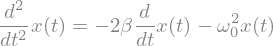

In [33]:
t= symbols('t',real=True)
omega_0, beta = symbols('omega_0, beta', positive = True, real = True)
x = Function('x')(t)
DGL = Eq(x.diff(t).diff(t), -omega_0**2*x - 2*beta*x.diff(t))
DGL

Lösen der DGL (allgemein):

In [34]:
dsolve(DGL)

Die Konstanten $C_1$ und $C_2$ werden durch die oben angegebene Anfangsbedingung ($x(0) = \alpha_1 \,\, , \,\, \dot{x}(0) = \alpha_2$) festgelegt. Die allgemeine Lösung der DGL mit diesen Anfangsbedingung lautet dann:

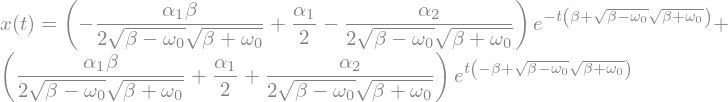

In [35]:
alpha_1, alpha_2= symbols('alpha_1, alpha_2', real = True)
Loes_allg=dsolve(DGL,ics={x.subs(t,0):alpha_1,x.diff(t).subs(t, 0): alpha_2})
Loes_allg

bzw. mittels 'simplify()'

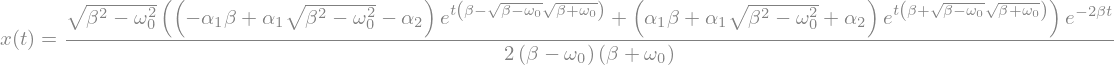

In [36]:
Loes_allg.simplify()

Festlegung der Parameter und Anfangsbedingung auf die oben angegebenen Werte:

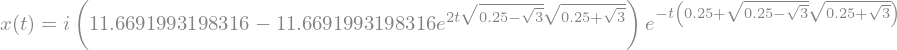

In [37]:
Loes_allg.subs({(omega_0,sqrt(3)),(beta,0.25),(alpha_1,0),(alpha_2,40)}).simplify()

Wir sind nur an dem reelwertigen Teil der Lösung interessiert:

In [38]:
Loes_allg_FestlPara=re(Loes_allg.rhs.subs({(omega_0,sqrt(3)),(beta,0.25),(alpha_1,0),(alpha_2,40)})).simplify()
Eq(Loes_allg.lhs,Loes_allg_FestlPara)

Wir stellen uns die berechnete analytische Lösung der DGL dar:

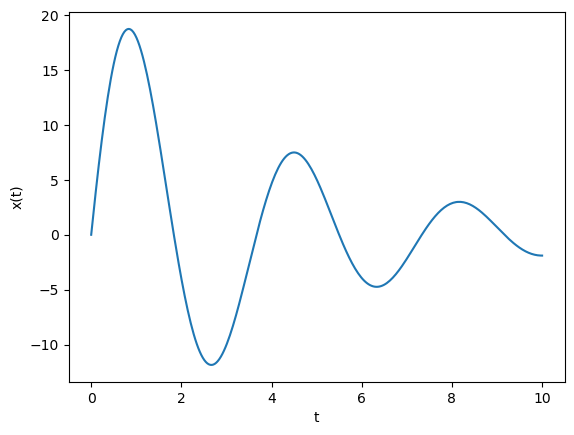

In [39]:
import matplotlib.pyplot as plt 
import numpy as np

tvals = np.linspace(0, 10, 300)
func = lambdify(t, simplify(Loes_allg_FestlPara))
plt.ylabel('x(t)')
plt.xlabel('t')
plt.plot(tvals,func(tvals));

Zur Zeit $t=10$ befindet sich der Wagen bei $x(10)=$ 

In [40]:
Loes_allg_FestlPara.subs(t,10)